# Mô tả dữ liệu

    Import thư viện

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

    Đọc dữ liệu từ file raw_data.csv

In [2]:
df = pd.read_csv('./raw data/raw_data.csv')

    Tổng quan về cổ phiếu AMZ từ 6/2017 đến hiện tại

In [3]:
new_features = ['p_change', 'close-1', 'close-1%', 'volume-1', 'volume-1%']
for i in new_features:
    df[i] = 0
    df[i] = df[i].astype('float')

for k in range(1, len(df)):
    df['p_change'][k] = df['Close'][k] - df['Open'][k]
    df['close-1'][k] = df['Close'][k] - df['Close'][k-1]
    df['close-1%'][k] = ((df['Close'][k] / df['Close'][k-1]) * 100) - 100
    if df['Volume'][k] != 0 and df['Volume'][k-1] != 0:
        df['volume-1'][k] = df['Volume'][k] - df['Volume'][k-1]
        df['volume-1%'][k] = ((df['Volume'][k] / df['Volume'][k-1]) * 100) - 100

df['DateFMT'] = pd.to_datetime(df['Date'])
df['year'] = df['DateFMT'].dt.year
df['month'] = df['DateFMT'].dt.month

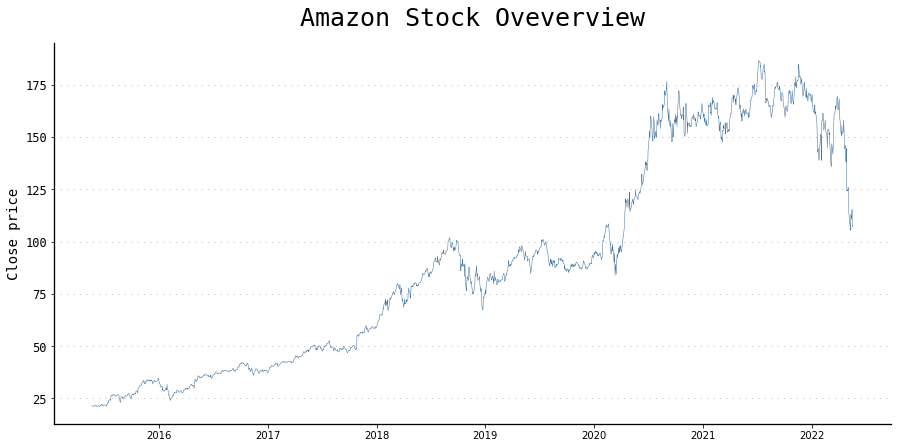

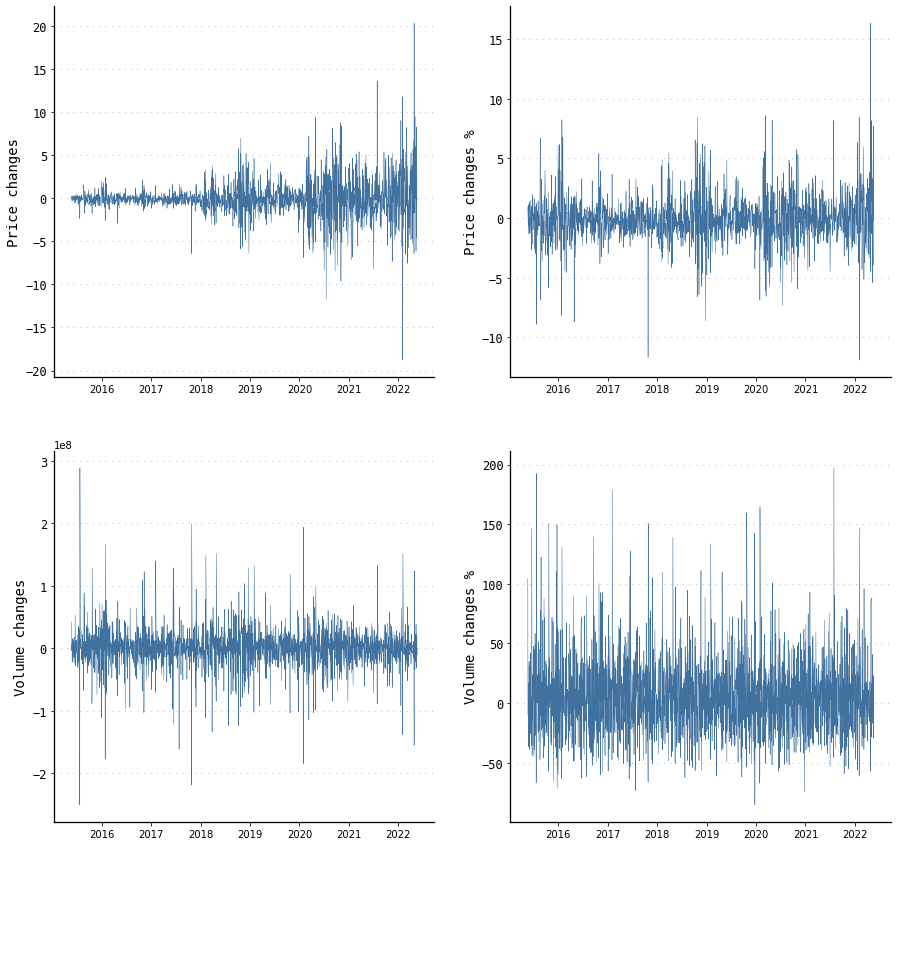

In [4]:

plt.figure(figsize=(15, 7))
plt.title("Amazon Stock Oveverview", size=25, y=1.03, fontname='monospace')
plt.grid(color='gray', linestyle=':', axis='y',
            alpha=0.8, zorder=0,  dashes=(1, 7))
a = sns.lineplot(x="DateFMT", y="Close", data=df, color='#41729F', linewidth=0.5)
plt.ylabel('Close price', size=14, fontname='monospace')
plt.xlabel('')
plt.yticks(size=12, fontname='monospace')

for j in ['right', 'top']:
    a.spines[j].set_visible(False)
for j in ['bottom', 'left']:
    a.spines[j].set_linewidth(1.3)

plt.show()

fig = plt.figure(figsize=(15, 15))
plt.subplot(221)
plt.grid(color='gray', linestyle=':', axis='y', alpha=0.8, zorder=0,  dashes = (1, 7))
a = sns.lineplot(x="DateFMT", y="close-1", data=df,
                    color='#41729F', linewidth=0.5)
plt.ylabel('Price changes', size=14, fontname='monospace')
plt.xlabel('')
plt.yticks(size=12, fontname='monospace')

plt.subplot(222)
plt.grid(color='gray', linestyle=':', axis='y', alpha=0.8, zorder=0,  dashes = (1, 7))
b = sns.lineplot(x="DateFMT", y="close-1%", data=df,
                    color='#41729F', linewidth=0.5)
plt.ylabel('Price changes %', size=14, fontname='monospace')
plt.xlabel('')
plt.yticks(size=12, fontname='monospace')

plt.subplot(223)
plt.grid(color='gray', linestyle=':', axis='y', alpha=0.8, zorder=0,  dashes = (1, 7))
c = sns.lineplot(x="DateFMT", y="volume-1", data=df,
                    color='#41729F', linewidth=0.5)
plt.ylabel('Volume changes', size=14, fontname='monospace')
plt.xlabel('')
plt.yticks(size=12, fontname='monospace')

plt.subplot(224)
plt.grid(color='gray', linestyle=':', axis='y', alpha=0.8, zorder=0,  dashes = (1, 7))
d = sns.lineplot(x="DateFMT", y="volume-1%", data=df,
                    color='#41729F', linewidth=0.5)
plt.ylabel('Volume changes %', size=14, fontname='monospace')
plt.xlabel('')
plt.yticks(size=12, fontname='monospace')

for i in [a, b, c, d]:
    for j in ['right', 'top']:
        i.spines[j].set_visible(False)
    for j in ['bottom', 'left']:
        i.spines[j].set_linewidth(1.3)

plt.figtext(0.5, -0.001, 'whitespace', color='white')

plt.show()


    Nhận xét: 
+ Giá cổ phiếu lẫn số giao dịch có sự biến động lớn, những lúc đỉnh điểm giá có thể tăng/giảm đến 15%
+ Chỉ dựa vào những giá trị trên thì khó đoán được xu hướng cổ phiếu Amazon


    Tổng hợp độ biến thiên các thành phần và biến động trong dataset dựa trên Volume, Price và SMA

In [5]:
# Get the data from the 4 month last year and calculate the growth rate
#data_features = df[['Date', 'Volume', 'Open', 'Close']].where(df['Date'] > 'Jan 01 2022').dropna()

data_features = df = df.iloc[:180]

data_features

,Date,Open,High,Low,Close,Adj Close,Volume,p_change,close-1,close-1%,volume-1,volume-1%,DateFMT,year,month
0,May 20 2022,109.57,109.90,105.01,107.59,107.59,99500000,0.00,0.00,0.000000,0.0,0.000000,2022-05-20,2022,5
1,May 19 2022,106.28,110.03,106.19,107.32,107.32,88142000,1.04,-0.27,-0.250953,-11358000.0,-11.415075,2022-05-19,2022,5
2,May 18 2022,111.44,112.85,106.25,107.11,107.11,108380000,-4.33,-0.21,-0.195676,20238000.0,22.960677,2022-05-18,2022,5
3,May 17 2022,113.28,115.80,111.28,115.37,115.37,76448000,2.09,8.26,7.711698,-31932000.0,-29.463001,2022-05-17,2022,5
4,May 16 2022,113.10,113.99,110.35,110.81,110.81,74566000,-2.29,-4.56,-3.952501,-1882000.0,-2.461804,2022-05-16,2022,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,Sep 10 2021,175.09,175.42,173.15,173.46,173.46,47946000,-1.63,0.60,0.347102,-3434000.0,-6.683534,2021-09-10,2021,9
176,Sep 09 2021,176.30,177.50,174.02,174.21,174.21,54384000,-2.09,0.75,0.432376,6438000.0,13.427606,2021-09-09,2021,9
177,Sep 08 2021,175.58,177.28,174.78,176.27,176.27,61068000,0.69,2.06,1.182481,6684000.0,12.290380,2021-09-08,2021,9
178,Sep 07 2021,173.90,176.40,173.85,175.46,175.46,54758000,1.56,-0.81,-0.459522,-6310000.0,-10.332744,2021-09-07,2021,9


([<matplotlib.axis.XTick at 0x24f1be96bc0>,
 [Text(0, 0, 'May 20 2022'),
  Text(1, 0, 'May 19 2022'),
  Text(2, 0, 'May 18 2022'),
  Text(3, 0, 'May 17 2022'),
  Text(4, 0, 'May 16 2022'),
  Text(5, 0, 'May 13 2022'),
  Text(6, 0, 'May 12 2022'),
  Text(7, 0, 'May 11 2022'),
  Text(8, 0, 'May 10 2022'),
  Text(9, 0, 'May 09 2022'),
  Text(10, 0, 'May 06 2022'),
  Text(11, 0, 'May 05 2022'),
  Text(12, 0, 'May 04 2022'),
  Text(13, 0, 'May 03 2022'),
  Text(14, 0, 'May 02 2022'),
  Text(15, 0, 'Apr 29 2022'),
  Text(16, 0, 'Apr 28 2022'),
  Text(17, 0, 'Apr 27 2022'),
  Text(18, 0, 'Apr 26 2022'),
  Text(19, 0, 'Apr 25 2022'),
  Text(20, 0, 'Apr 22 2022'),
  Text(21, 0, 'Apr 21 2022'),
  Text(22, 0, 'Apr 20 2022'),
  Text(23, 0, 'Apr 19 2022'),
  Text(24, 0, 'Apr 18 2022'),
  Text(25, 0, 'Apr 14 2022'),
  Text(26, 0, 'Apr 13 2022'),
  Text(27, 0, 'Apr 12 2022'),
  Text(28, 0, 'Apr 11 2022'),
  Text(29, 0, 'Apr 08 2022'),
  Text(30, 0, 'Apr 07 2022'),
  Text(31, 0, 'Apr 06 2022'),
  Text

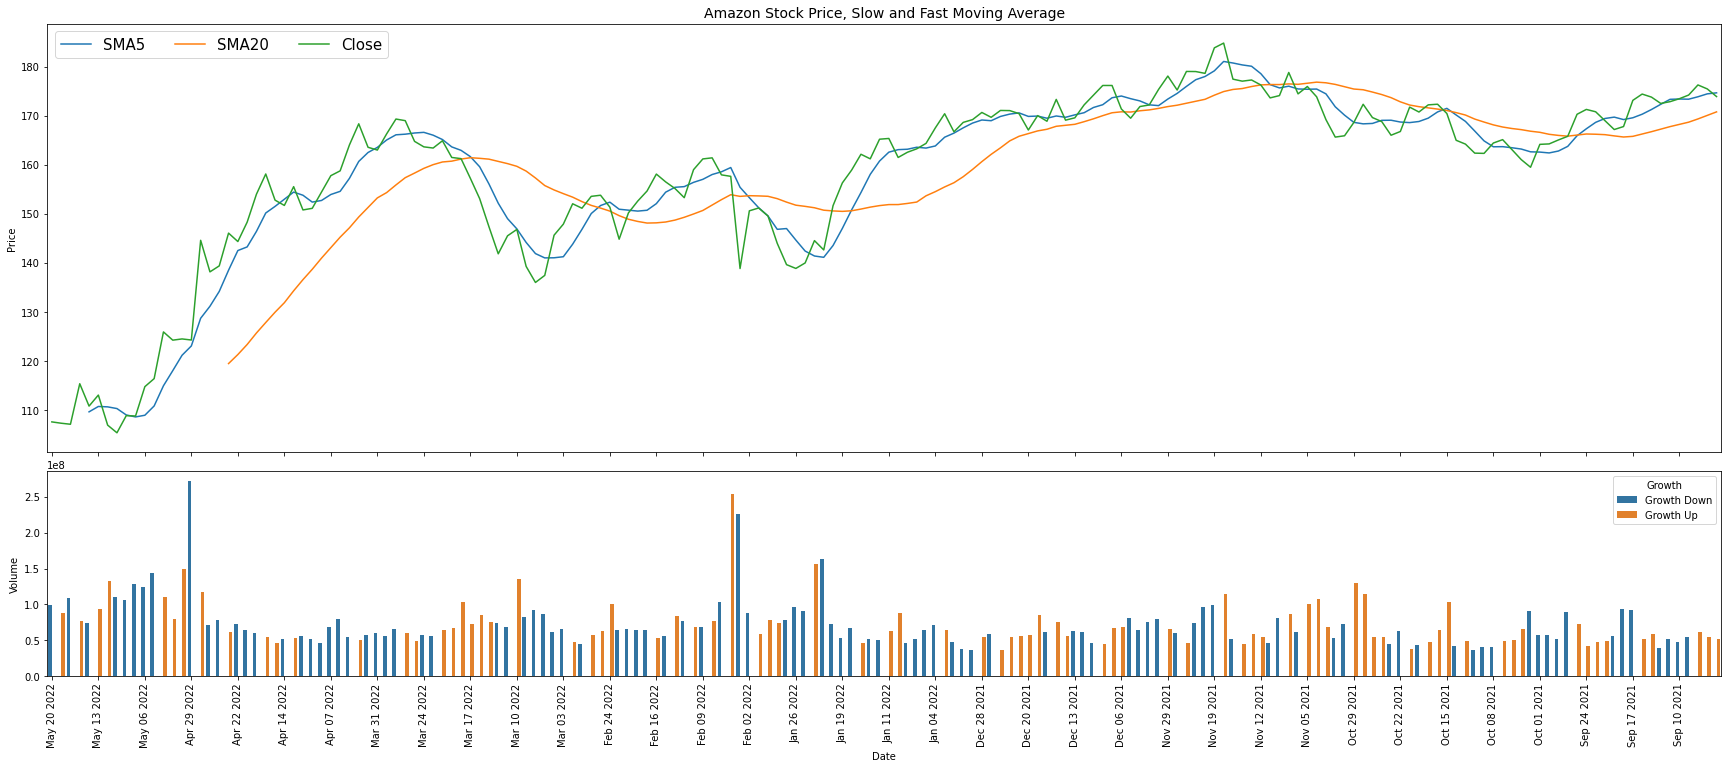

In [6]:
# Set the value for colum 'Growth' based on the formula of Growth
conditions = [(data_features['Open'] - data_features['Close']) < 0, (data_features['Open'] - data_features['Close']) > 0]
values = ['Growth Up', 'Growth Down']
data_features['Growth'] = np.select(conditions, values, default = 'No Growth')

# Calculate the SMA (Simple Moving Average) of the stock in 4 month last year
data_features['SMA5'] = data_features['Close'].transform(lambda x: x.rolling(window=5).mean())
data_features['SMA20'] = data_features['Close'].transform(lambda x: x.rolling(window=20).mean())


# Plot Bar chart and line chart to show the growth rate of stock in the last year base on Volume, Price and SMA values
plt.figure(figsize=(30,12))
ax0 = plt.subplot2grid((6,4), (0,0), rowspan=4, colspan=4)
ax0.plot(data_features['Date'], data_features['SMA5'], data_features['Date'], data_features['SMA20'], data_features['Date'], data_features['Close'])
ax0.set_ylabel('Price')
ax0.legend(['SMA5','SMA20','Close'],ncol=3, loc = 'upper left', fontsize = 15.0)
plt.setp(ax0.get_xticklabels(), visible=False)
plt.title('Amazon Stock Price, Slow and Fast Moving Average', fontsize = 14.0)
ax1 = plt.subplot2grid((6,4), (4,0), rowspan=2, colspan=4, sharex = ax0)
sns.barplot(x = data_features['Date'], y = data_features['Volume'], hue=data_features['Growth'])
plt.xticks(rotation=90)
plt.xticks(np.arange(0, len(data_features['Date']), step = 5))

     Đồ thị trên là biểu diễn độ biến động về giá và khối lượng giao dịch của cổ phiếu facebook trong thời gian 6 tháng : 
+ Đồ thị nằm ở phía trên là đồ thị biểu diễn biến động giá đóng sàn của cổ phiếu Amazon theo thời gian.

+ Đồ thị có chứa tham số SMA: Với tham số SMA (Simple Moving Average) một dạng đồ thị đường phổ biến dùng để phân tích kỹ thuật, được tính toán bằng trung bình cộng giá đóng cửa của n phiên, đây là dạng đường dùng để dự đoán xu hướng của giá trị cổ phiếu gồm tăng, giảm và đi ngang.

+ Đồ thị nằm ở phía dưới là một đồ thị cột thể hiện khối lượng giao dịch cổ phiếu với hai loại đó là màu xanh là tăng trưởng âm và màu cam tức là tăng trưởng dương.


    Nhận xét:
+ Ta có thể thay rằng cổ phiếu Amazon là một cố phiếu biến đổi theo xu hướng ngắn hạn bằng cách ta có thể nhìn vào đường SMA5 bám rất sát so với đường Close điều đó báo hiệu rằng việc biến đổi của các phiên giao dịch của chứng khoán có một xu thế biến đổi nhanh với khoảng thời gian 5 - 7 ngày

+ Quan sát được đường giá đóng sàn ta có thể nhận thấy rằng là trong suốt thời điểm mà giá cả tăng thì không có sự gia tăng đột biến của khối lượng giao dịch và sự gia tăng chỉ xảy ra khi có sự biến thiên đột ngột của thị trường sau khi giá trị đóng của sàn bị biến đổi tức là khi dấu hiệu chạm đáy xảy ra từ đó ta thấy ta có thể nhìn thấy khối lượng giao dịch tăng cao là một xu thế có thể mua vào và bán ra để thu được lợi nhuận

    Xu hướng của cổ phiếu Amazon trong 6 tháng đầu năm 2022

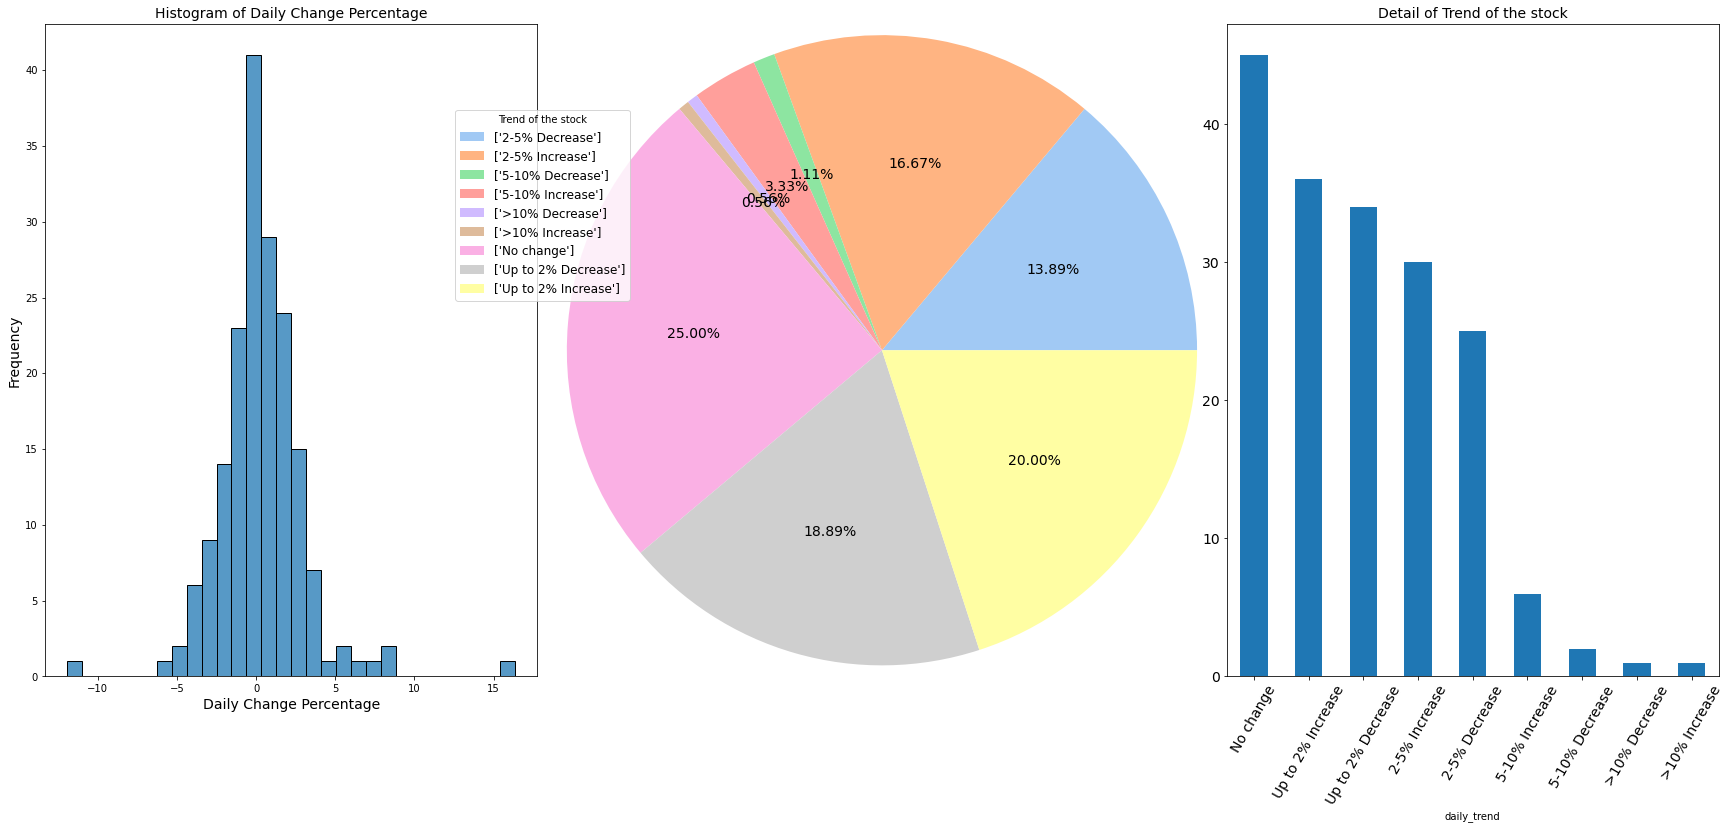

In [7]:
plt.figure(figsize=(30, 12))

# Create the col on daily change percentage for the stock 
data_features['daily_change_percentage'] = data_features['Close'].pct_change() * 100
data_features['returns'] = data_features['daily_change_percentage'] / data_features['Close']
data_features['daily_change_percentage'] = data_features['daily_change_percentage'].fillna(0)
ax2 = plt.subplot(1, 3, 1)
sns.histplot(data_features['daily_change_percentage'])
ax2.set_title("Histogram of Daily Change Percentage", fontsize = 14.0)
ax2.set_xlabel("Daily Change Percentage", fontsize = 14.0)
ax2.set_ylabel("Frequency", fontsize = 14.0)

# Create the pie chart and bar chart about trend of the stock in 4 month last year
def daily_trend(x):
    if x > -0.5 and x < 0.5:
        return 'No change'
    if x > 0.5 and x < 2.0:
        return 'Up to 2% Increase'
    if x > -2.0 and x < -0.5:
        return 'Up to 2% Decrease'
    if x > 2.0 and x < 5.0:
        return '2-5% Increase'
    if x > -5.0 and x < -2.0:
        return '2-5% Decrease'
    if x > -10.0 and x < -5.0:
        return '5-10% Decrease'
    if x > 5.0 and x < 10.0:
        return '5-10% Increase'
    if x > 10.0:
        return '>10% Increase'
    if x < -10.0:
        return '>10% Decrease'
    
data_features['daily_trend'] = data_features['daily_change_percentage'].apply(lambda x: daily_trend(x))
data_features['daily_trend'] = data_features['daily_trend'].replace('None', 'No change')

data_pie_data = data_features.groupby('daily_trend')
ax3 = plt.subplot(1, 3, 2)
colors = sns.color_palette('pastel')[0:9]
ax3.pie(data_pie_data['daily_trend'].count(), autopct= '%.2f%%', radius= 1.6, colors= colors, textprops={'fontsize': 14.0})
ax3.legend(title = 'Trend of the stock', loc = 'upper right', bbox_to_anchor=(0.0, 1), prop = {'size': 12.0}
           , labels = ['%s' % x for x in data_pie_data['daily_trend'].unique()])

ax4 = plt.subplot(1, 3, 3)
data_pie_data['daily_trend'].count().sort_values(ascending = False).plot.bar(rot = 60, fontsize = 14.0)
ax4.set_title("Detail of Trend of the stock", fontsize = 14.0)

plt.show()

    Nhận xét
+ Tập đồ thị bao gồm 3 đồ thị trước hết ta đi tới đồ thị phần tay trái

+ Đây là đồ thị thể hiện tần số của tỷ lệ phần trăm thay đổi theo tỷ giá đóng sàn của ngày hiện tại so với ngày trước đó, thông qua đồ thị histogram ta có thể thấy được thể hiện dưới dạng gồm 2 khối, một là khối các giá trị ngoại lại xuất hiện nằm tách biệt so với đồ thị làm cho histogram có dạng phân phối đảo nhỏ , hai là khối thể hiện được một phân phối lệch chuẩn với xu hướng tập trung các giá trị ở chính giữa và giảm dần về hai bên, điều, thế nhưng phần tỷ lệ dương lớn hơn tỷ lệ âm và ta có thể thấy một điều là tỷ giá của cổ phiếu Amazon có xu hướng tập trung ở vùng trung tâm và ít có xu hướng tăng đột ngột trừ những giá trị ngoại lại xuất hiện ngẫu nhiên

+ Để thấy rõ phân bố các xu hướng ta tiếp tục đi vào đồ thị số 2 và số 3 thì đây lần lượt hai đồ thị biểu thị tần suất của loại xu hướng của cổ phiếu Amazon

+ Với độ thị hai đây là loại đồ thị tròn dùng để thể hiện các trending dưới dạng tỷ lệ phần trăm và độ thị thứ ba là một đồ thị chi tiết hơn để minh họa số liệu phần trăm cho đồ thị hai

